In [1]:
# library
library(caret)          # 샘플링
library(nnet)           # 인공신경망
library(party)          # 의사결정나무
library(randomForest)   # 랜덤 포레스트
library(e1071)          # SVM
library(stringr)
library(dplyr)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin


Attaching package: 'stringr'

The following object is masked from 'package:strucchange':

    boundary


Attaching package: 'dplyr'

The following object is masked from 'package:randomForest':

    combine

The following objects are masked from 'package:stats':

 

In [2]:
save1 <- read.table('../Data/인구이동.txt',fileEncoding = 'utf-8')

In [3]:
head(save1)
tail(save1)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
2014.01,서울특별시,"111,094","54,194","56,900","115,366","56,759","58,607","29,855","14,424",...,"21,432","39,483","19,446","20,037","43,755","22,011","21,744","-4,272","-2,565","-1,707"
2014.01,종로구,"1,661",818,843,"1,998","1,023",975,241,117,...,537,721,365,356,679,365,314,-337,-205,-132
2014.01,중구,"1,461",742,719,"1,689",876,813,312,146,...,400,498,250,248,528,281,247,-228,-134,-94
2014.01,용산구,"2,765","1,359","1,406","2,868","1,412","1,456",503,244,...,630,"1,074",522,552,"1,106",539,567,-103,-53,-50
2014.01,성동구,"2,902","1,396","1,506","3,224","1,603","1,621",599,283,...,739,972,476,496,"1,177",611,566,-322,-207,-115
2014.01,광진구,"3,776","1,795","1,981","4,178","2,046","2,132","1,023",490,...,842,"1,432",654,778,"1,539",782,757,-402,-251,-151


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
2257,2021.03,동작구,"7,245","3,504","3,741","6,856","3,326","3,530","1,471",684,...,"1,473","2,615","1,275","1,340","2,518","1,248","1,270",389,178,211
2258,2021.03,관악구,"9,971","5,001","4,970","10,248","5,193","5,055","2,514","1,275",...,"1,825","4,377","2,194","2,183","4,113","2,122","1,991",-277,-192,-85
2259,2021.03,서초구,"6,102","2,914","3,188","7,127","3,392","3,735","1,475",703,...,"1,773","2,052",971,"1,081","2,382","1,192","1,190","-1,025",-478,-547
2260,2021.03,강남구,"8,868","4,298","4,570","10,145","4,954","5,191","2,449","1,198",...,"2,228","3,144","1,527","1,617","3,346","1,634","1,712","-1,277",-656,-621
2261,2021.03,송파구,"10,653","5,079","5,574","12,743","6,230","6,513","3,625","1,722",...,"2,114","3,529","1,659","1,870","4,926","2,430","2,496","-2,090","-1,151",-939
2262,2021.03,강동구,"9,942","4,826","5,116","7,823","3,876","3,947","3,100","1,495",...,892,"2,605","1,260","1,345","2,943","1,493","1,450","2,119",950,"1,169"


In [4]:
colnames(save1) <- c('기간,','자치구','총전입(①+②+④)','총전입(①+②+④)','총전입(①+②+④)','총전출(①+③+⑤)','총전출(①+③+⑤)','총전출(①+③+⑤)','구내이동(①)','구내이동(①)','구내이동(①)','전입(②)','전입(②)','전입(②)','전출(③)','전출(③)','전출(③)','전입(④)','전입(④)','전입(④)','전출(⑤)','전출(⑤)','전출(⑤)','순이동','순이동','순이동')

In [5]:
head(save1)

"기간,",자치구,총전입(①+②+④),총전입(①+②+④).1,총전입(①+②+④).2,총전출(①+③+⑤),총전출(①+③+⑤).1,총전출(①+③+⑤).2,구내이동(①),구내이동(①).1,...,전출(③),전입(④),전입(④).1,전입(④).2,전출(⑤),전출(⑤).1,전출(⑤).2,순이동,순이동.1,순이동.2
2014.01,서울특별시,"111,094","54,194","56,900","115,366","56,759","58,607","29,855","14,424",...,"21,432","39,483","19,446","20,037","43,755","22,011","21,744","-4,272","-2,565","-1,707"
2014.01,종로구,"1,661",818,843,"1,998","1,023",975,241,117,...,537,721,365,356,679,365,314,-337,-205,-132
2014.01,중구,"1,461",742,719,"1,689",876,813,312,146,...,400,498,250,248,528,281,247,-228,-134,-94
2014.01,용산구,"2,765","1,359","1,406","2,868","1,412","1,456",503,244,...,630,"1,074",522,552,"1,106",539,567,-103,-53,-50
2014.01,성동구,"2,902","1,396","1,506","3,224","1,603","1,621",599,283,...,739,972,476,496,"1,177",611,566,-322,-207,-115
2014.01,광진구,"3,776","1,795","1,981","4,178","2,046","2,132","1,023",490,...,842,"1,432",654,778,"1,539",782,757,-402,-251,-151


In [6]:
save2 <- save1[,c(1,2,3,4,5,6,7,8)]
head(save2)

"기간,",자치구,총전입(①+②+④),총전입(①+②+④).1,총전입(①+②+④).2,총전출(①+③+⑤),총전출(①+③+⑤).1,총전출(①+③+⑤).2
2014.01,서울특별시,"111,094","54,194","56,900","115,366","56,759","58,607"
2014.01,종로구,"1,661",818,843,"1,998","1,023",975
2014.01,중구,"1,461",742,719,"1,689",876,813
2014.01,용산구,"2,765","1,359","1,406","2,868","1,412","1,456"
2014.01,성동구,"2,902","1,396","1,506","3,224","1,603","1,621"
2014.01,광진구,"3,776","1,795","1,981","4,178","2,046","2,132"


In [7]:
colnames(save2) <- c('기간','자치구','총전입','여성전입','남성전입','총전출','여성전출','남성전출')
head(save2)

기간,자치구,총전입,여성전입,남성전입,총전출,여성전출,남성전출
2014.01,서울특별시,"111,094","54,194","56,900","115,366","56,759","58,607"
2014.01,종로구,"1,661",818,843,"1,998","1,023",975
2014.01,중구,"1,461",742,719,"1,689",876,813
2014.01,용산구,"2,765","1,359","1,406","2,868","1,412","1,456"
2014.01,성동구,"2,902","1,396","1,506","3,224","1,603","1,621"
2014.01,광진구,"3,776","1,795","1,981","4,178","2,046","2,132"


In [8]:
save3 <- save2[rownames(subset(save2,자치구!='서울특별시')),]

In [9]:
head(save3)

,기간,자치구,총전입,여성전입,남성전입,총전출,여성전출,남성전출
2,2014.01,종로구,"1,661",818,843,"1,998","1,023",975
3,2014.01,중구,"1,461",742,719,"1,689",876,813
4,2014.01,용산구,"2,765","1,359","1,406","2,868","1,412","1,456"
5,2014.01,성동구,"2,902","1,396","1,506","3,224","1,603","1,621"
6,2014.01,광진구,"3,776","1,795","1,981","4,178","2,046","2,132"
7,2014.01,동대문구,"3,445","1,783","1,662","3,764","1,948","1,816"


In [10]:
rownames(save3)<- c()

In [11]:
save3 <- arrange(save3,기간,자치구)

In [12]:
str(save3)

'data.frame':	2175 obs. of  8 variables:
 $ 기간    : num  2014 2014 2014 2014 2014 ...
 $ 자치구  : Factor w/ 26 levels "강남구","강동구",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ 총전입  : Factor w/ 1944 levels "1,324","1,334",..: 1780 858 380 1414 1567 627 762 259 1201 405 ...
 $ 여성전입: Factor w/ 1686 levels "1,000","1,010",..: 1256 522 94 955 1138 289 427 22 778 133 ...
 $ 남성전입: Factor w/ 1710 levels "1,000","1,002",..: 1346 549 170 997 1079 390 484 16 801 180 ...
 $ 총전출  : Factor w/ 1956 levels "1,347","1,366",..: 1726 894 460 1378 1638 649 691 277 1456 445 ...
 $ 여성전출: Factor w/ 1698 levels "1,000","1,005",..: 1240 607 220 899 1237 376 438 72 1006 205 ...
 $ 남성전출: Factor w/ 1720 levels "1,000","1,001",..: 1327 595 234 1046 1161 423 434 45 1059 226 ...


In [13]:
for (i in 3: ncol(save3)){ 
    save3[,i] <- as.numeric(str_replace_all(as.character(save3[,i]),',',''))

}

In [14]:
colSums(is.na(save3))

기간   자치구   총전입 여성전입 남성전입   총전출 여성전출 남성전출 
       0        0        0        0        0        0        0        0

In [15]:
str(save3)

'data.frame':	2175 obs. of  8 variables:
 $ 기간    : num  2014 2014 2014 2014 2014 ...
 $ 자치구  : Factor w/ 26 levels "강남구","강동구",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ 총전입  : num  7806 4438 2936 5938 6620 ...
 $ 여성전입: num  3703 2173 1392 2888 3369 ...
 $ 남성전입: num  4103 2265 1544 3050 3251 ...
 $ 총전출  : num  7731 4899 3475 6139 7261 ...
 $ 여성전출: num  3728 2450 1728 2911 3718 ...
 $ 남성전출: num  4003 2449 1747 3228 3543 ...


In [16]:
save3$자치구 <- factor(save3$자치구)

In [17]:
str(save3)

'data.frame':	2175 obs. of  8 variables:
 $ 기간    : num  2014 2014 2014 2014 2014 ...
 $ 자치구  : Factor w/ 25 levels "강남구","강동구",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ 총전입  : num  7806 4438 2936 5938 6620 ...
 $ 여성전입: num  3703 2173 1392 2888 3369 ...
 $ 남성전입: num  4103 2265 1544 3050 3251 ...
 $ 총전출  : num  7731 4899 3475 6139 7261 ...
 $ 여성전출: num  3728 2450 1728 2911 3718 ...
 $ 남성전출: num  4003 2449 1747 3228 3543 ...


In [18]:
cor(save3$총전입,save3$총전출)

[1] 0.9465694

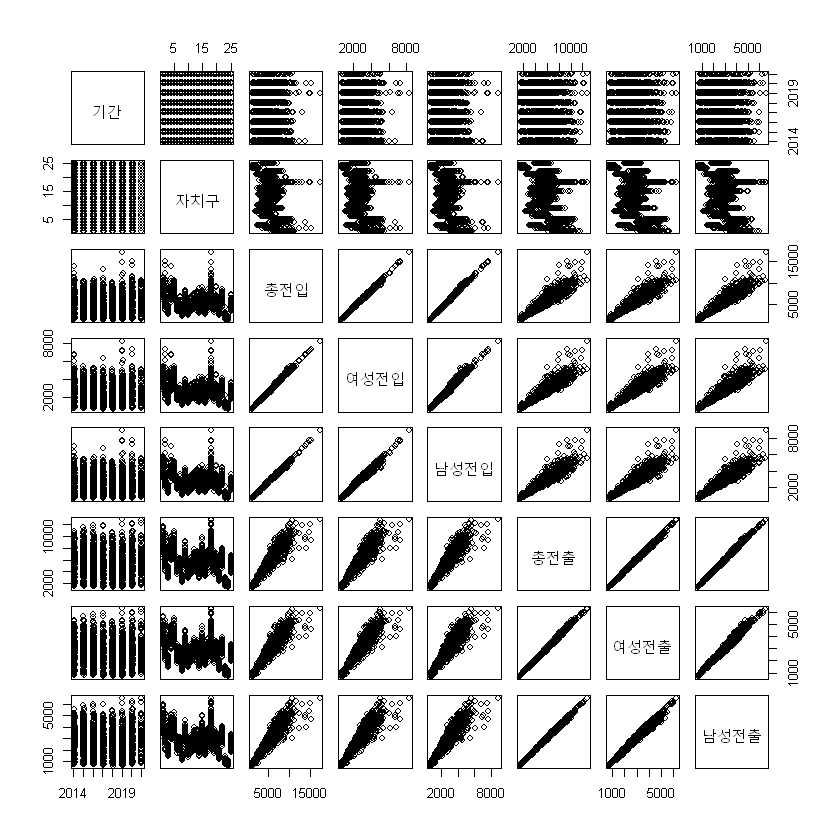

In [19]:
plot(save3)

In [20]:
head(arrange(save3,기간,desc(총전출)))
head(arrange(save3,기간,총전출))

기간,자치구,총전입,여성전입,남성전입,총전출,여성전출,남성전출
2014.01,강남구,7806,3703,4103,7731,3728,4003
2014.01,관악구,6620,3369,3251,7261,3718,3543
2014.01,송파구,8954,4334,4620,7183,3366,3817
2014.01,노원구,5235,2557,2678,6386,3115,3271
2014.01,강서구,5938,2888,3050,6139,2911,3228
2014.01,서초구,7352,3488,3864,6055,2920,3135


기간,자치구,총전입,여성전입,남성전입,총전출,여성전출,남성전출
2014.01,중구,1461,742,719,1689,876,813
2014.01,종로구,1661,818,843,1998,1023,975
2014.01,금천구,2253,1177,1076,2492,1326,1166
2014.01,용산구,2765,1359,1406,2868,1412,1456
2014.01,성동구,2902,1396,1506,3224,1603,1621
2014.01,서대문구,3122,1533,1589,3316,1601,1715


In [21]:
head(arrange(save3,기간,desc(총전입)))
head(arrange(save3,기간,총전입))

기간,자치구,총전입,여성전입,남성전입,총전출,여성전출,남성전출
2014.01,송파구,8954,4334,4620,7183,3366,3817
2014.01,강남구,7806,3703,4103,7731,3728,4003
2014.01,서초구,7352,3488,3864,6055,2920,3135
2014.01,관악구,6620,3369,3251,7261,3718,3543
2014.01,강서구,5938,2888,3050,6139,2911,3228
2014.01,은평구,5341,2537,2804,5909,2833,3076


기간,자치구,총전입,여성전입,남성전입,총전출,여성전출,남성전출
2014.01,중구,1461,742,719,1689,876,813
2014.01,종로구,1661,818,843,1998,1023,975
2014.01,금천구,2253,1177,1076,2492,1326,1166
2014.01,용산구,2765,1359,1406,2868,1412,1456
2014.01,성동구,2902,1396,1506,3224,1603,1621
2014.01,강북구,2936,1392,1544,3475,1728,1747


기간,자치구,총전입,여성전입,남성전입,총전출,여성전출,남성전출
2014.01,강남구,7806,3703,4103,7731,3728,4003
2014.01,중구,1461,742,719,1689,876,813
2014.02,강남구,11261,5493,5768,10765,5217,5548
2014.02,중구,1990,990,1000,2149,1107,1042
2014.03,강남구,10666,5218,5448,10176,5010,5166
2014.03,중구,2084,1082,1002,2333,1227,1106


,기간,자치구,총전입,여성전입,남성전입,총전출,여성전출,남성전출
169,2021.01,강남구,7487,3674,3813,8193,4006,4187
170,2021.01,중구,1585,787,798,1758,873,885
171,2021.02,강남구,9379,4514,4865,10064,4930,5134
172,2021.02,중구,1854,911,943,2052,1021,1031
173,2021.03,강남구,8868,4298,4570,10145,4954,5191
174,2021.03,중구,1966,949,1017,2144,1075,1069


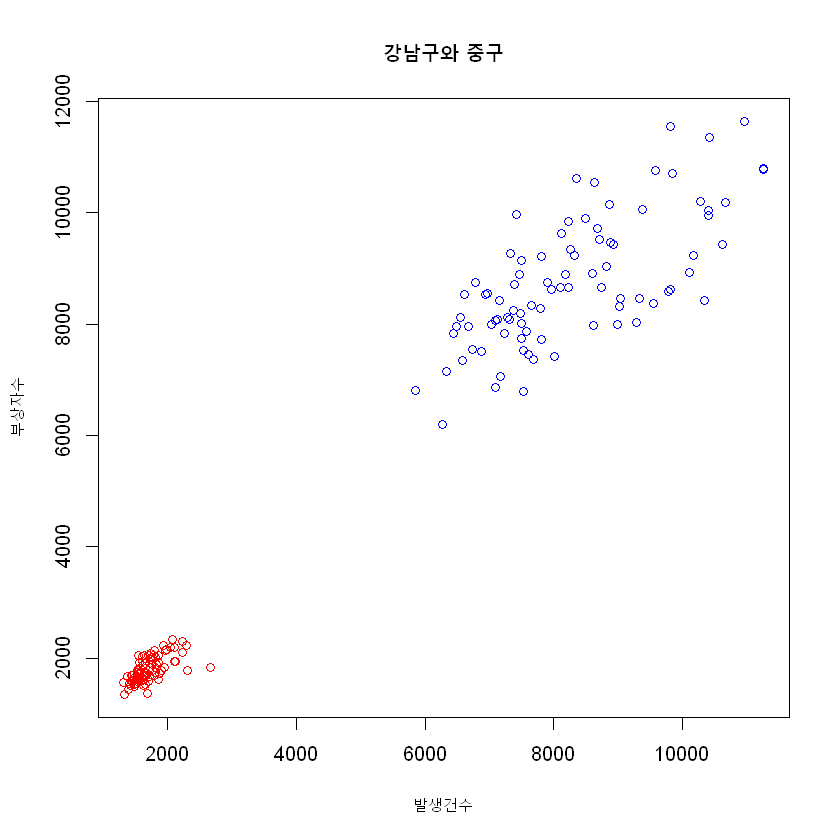

In [22]:
seoul.double <- subset(save3,자치구 == "중구" | 자치구 == "강남구")
rownames(seoul.double) <- c()
head(seoul.double)
tail(seoul.double)
# for mac
options(warn = -1)
par(family = "AppleGothic")

# 지수 없애기
options(scipen = 100)
plot(seoul.double$총전입,seoul.double$총전출,
#     xlim = c(0,400),
#     ylim = c(0,600),
     col = ifelse(seoul.double$총전입 >= 5000,'blue','red'),
     xlab = "발생건수",
     ylab = "부상자수",
     main = "강남구와 중구",
    )

In [25]:
save4 <- save3

In [26]:
save4$기간<-substring(save4$기간,1,4)

In [28]:
head(save4)

기간,자치구,총전입,여성전입,남성전입,총전출,여성전출,남성전출
2014,강남구,7806,3703,4103,7731,3728,4003
2014,강동구,4438,2173,2265,4899,2450,2449
2014,강북구,2936,1392,1544,3475,1728,1747
2014,강서구,5938,2888,3050,6139,2911,3228
2014,관악구,6620,3369,3251,7261,3718,3543
2014,광진구,3776,1795,1981,4178,2046,2132


In [29]:
aggregate(save4,자치구,sum)

ERROR: Error in aggregate.data.frame(save4, 자치구, sum): 객체 '자치구'를 찾을 수 없습니다


In [30]:
help(aggregate)

In [61]:
temp <- c()
cul <- c()
for(i in 2014:2021){
    총전입<-aggregate(총전입 ~ 자치구, data = subset(save4,기간==i),sum)
    총전출<-aggregate(총전출 ~ 자치구, data = subset(save4,기간==i),sum)[,2]
    cul<-cbind('기간'=i,총전입,총전출)
    temp <- rbind(temp,cul)
}
head(temp)
tail(temp)
save5<-temp

기간,자치구,총전입,총전출
2014,강남구,115906,104412
2014,강동구,66412,75575
2014,강북구,48224,52641
2014,강서구,109436,96548
2014,관악구,90987,98182
2014,광진구,56778,64189


,기간,자치구,총전입,총전출
195,2021,영등포구,18043,17334
196,2021,용산구,11122,10423
197,2021,은평구,15519,17609
198,2021,종로구,6590,7074
199,2021,중구,5405,5954
200,2021,중랑구,13894,15118


In [62]:
subset(save5,기간>=2020)

,기간,자치구,총전입,총전출
151,2020,강남구,95325,101582
152,2020,강동구,101437,78271
153,2020,강북구,41625,46656
154,2020,강서구,87198,99573
155,2020,관악구,98301,103226
156,2020,광진구,55926,60703
157,2020,구로구,60885,64024
158,2020,금천구,35753,36963
159,2020,노원구,68176,77707
160,2020,도봉구,40435,47892


In [23]:
write.csv(save3,"../Data/전입전출.csv",row.names=F)

In [64]:
write.csv(save5,'../Data/전입전출연간정제.csv',row.names=F)